#### Importing necessary Libraries:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
from scipy.stats import anderson,shapiro,kstest
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
house_price_prediction = sklearn.datasets.load_boston()
#df.head()

In [3]:
print(house_price_prediction)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
#Loading the dataset to a dataframe
df = pd.DataFrame(house_price_prediction.data, columns= house_price_prediction.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Adding the target column to the dataframe
df['PRICE']= house_price_prediction.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Displaying basic information about the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Shape of the dataset:",df.shape)

Number of rows: 506
Number of columns: 14
Shape of the dataset: (506, 14)


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

#### Checking for null values:

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There are no null values.

#### Splitting the data into numerical and categorical:

In [11]:
#numerical features in the dataset

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature!='PRICE']
print('Number of numerical variables:', len(numerical_features))

# visualise the numerical variables
print("Numerical features are:")
df[numerical_features].head()

Number of numerical variables: 13
Numerical features are:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Understanding the correlation between the features:

1. Positive Correlation

2. Negative Correlation

In [12]:
correlation = df.corr()

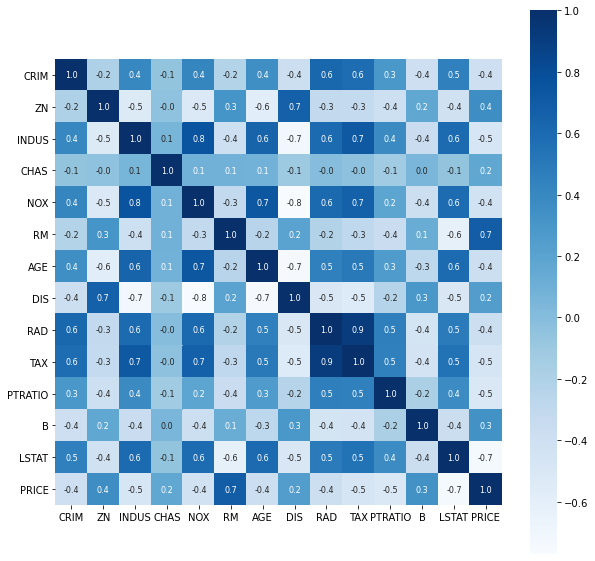

In [13]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

#### Splitting the data to Dependent (y) and independent (x) variables:

In [14]:
x = df.drop(columns='PRICE',axis=1)
y = df.iloc[:,-1]

In [15]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
print("Shape of train data:")
print("Shape of X Train:",X_train.shape)
print("Shape of Y Train:",Y_train.shape)

print("\nShape of test data:")
print("Shape of X Test:",X_test.shape)
print("Shape of Y Test:",Y_test.shape)

Shape of train data:
Shape of X Train: (404, 13)
Shape of Y Train: (404,)

Shape of test data:
Shape of X Test: (102, 13)
Shape of Y Test: (102,)


#### Checking for Linearity:

In [19]:
df1=df.copy()

Scatter plot for Linearity

Price vs CRIM


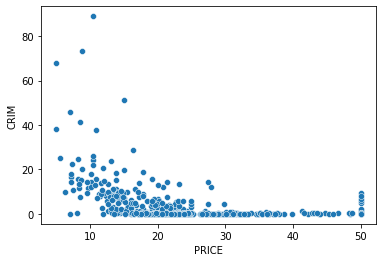

Price vs ZN


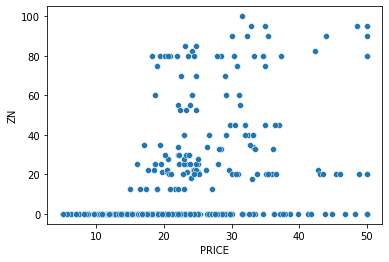

Price vs INDUS


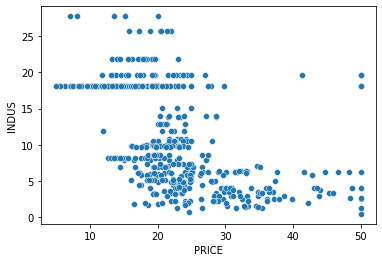

Price vs CHAS


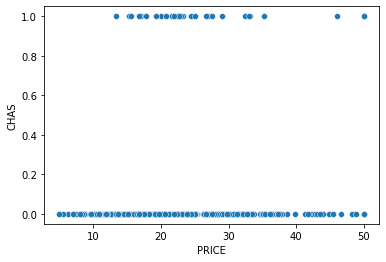

Price vs NOX


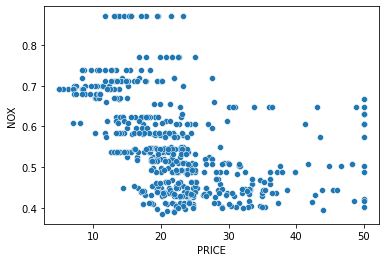

Price vs RM


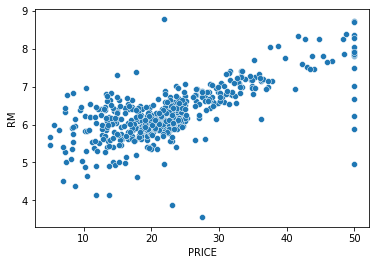

Price vs AGE


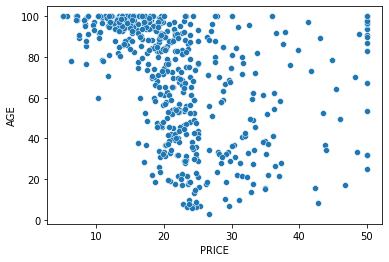

Price vs DIS


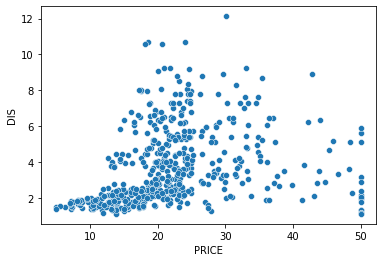

Price vs RAD


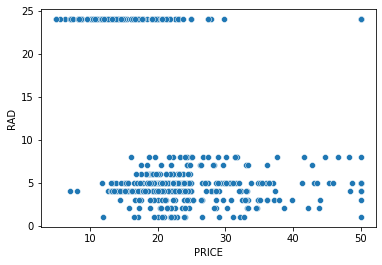

Price vs TAX


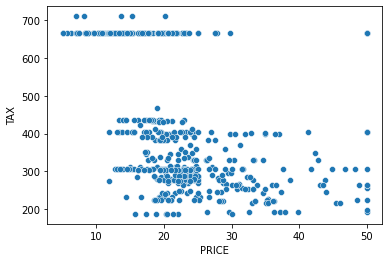

Price vs PTRATIO


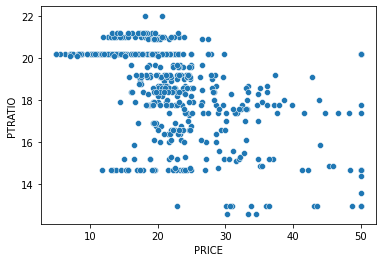

Price vs B


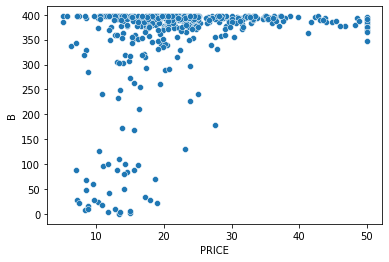

Price vs LSTAT


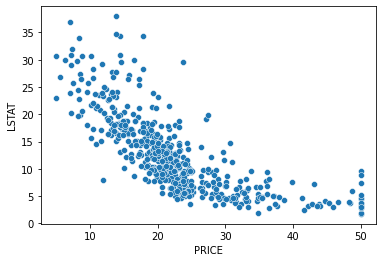

In [20]:
print("Scatter plot for Linearity\n")
for feature in numerical_features:
        print("Price vs",feature)
        sns.scatterplot(data=df1,x=df1.PRICE,y=df1[feature])
        plt.show()

In [21]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


To check if the correlation is significant or not we do Pearsonr.

Null Hypothesis - H0 : There "IS NOT a significant linear relationship(correlation)" between x and y in the population.

Alternate Hypothesis - Ha : There "IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation)" between x and y in the population.

In [23]:
for i in numerical_features:
    print("\nCorrelation between Price and",i,":")
    correlation,p_value=0,0
    correlation,p_value=pearsonr(df1[i],y)
    print("Correlation = ",correlation,"\nP_value = ",p_value)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")   


Correlation between Price and CRIM :
Correlation =  -0.3883046085868116 
P_value =  1.1739870821941207e-19
Significant.

Correlation between Price and ZN :
Correlation =  0.3604453424505432 
P_value =  5.713584153079442e-17
Significant.

Correlation between Price and INDUS :
Correlation =  -0.48372516002837296 
P_value =  4.900259981751351e-31
Significant.

Correlation between Price and CHAS :
Correlation =  0.1752601771902984 
P_value =  7.39062317051802e-05
Significant.

Correlation between Price and NOX :
Correlation =  -0.42732077237328264 
P_value =  7.065041586251507e-24
Significant.

Correlation between Price and RM :
Correlation =  0.6953599470715393 
P_value =  2.487228871007442e-74
Significant.

Correlation between Price and AGE :
Correlation =  -0.37695456500459623 
P_value =  1.5699822091877261e-18
Significant.

Correlation between Price and DIS :
Correlation =  0.24992873408590394 
P_value =  1.2066117273368359e-08
Significant.

Correlation between Price and RAD :
Correla

#### Checking for Normality of Dependent Variable: 

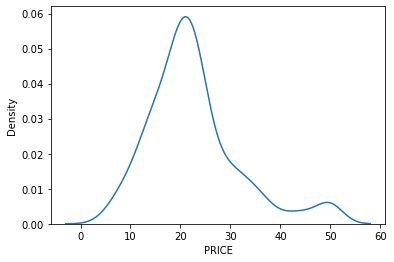

In [24]:
sns.kdeplot(y)
plt.show()

Dependent variable is not normally distributed.

To check the normality of the dependent variable, we do Shapiro-Wilk test.

Null Hypothesis - H0 : The data is normally distributed.

Alternate Hypothesis - Ha : The data is not normally distributed.

If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. If the p-value is greater than 0.05, then the null hypothesis is not rejected.

In [25]:
#Shapiro-Wilk test
statistic,p=shapiro(y)
print("Statistic = ",statistic,"\nP_value = ",p)
if p>0.05:
    print("Significant.")
else:
    print("Not Significant.")

Statistic =  0.91717529296875 
P_value =  4.940618243974614e-16
Not Significant.


To check the normality of the dependent variable, we do Kolmogorov-Smirnov test.

Null Hypothesis - H0 : The data is normally distributed.

Alternate Hypothesis - Ha : The data is not normally distributed.

If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. If the p-value is greater than 0.05, then the null hypothesis is not rejected.

In [27]:
#KS Test
stats,pv=kstest(y,'norm')
print("Statistic = ",stats,"\nP_value = ",pv)
if p>0.05:
    print("Normally Distributed.") #Normally distribute means significant
else:
    print("Not Normally Distributed.")

Statistic =  0.9999997133484281 
P_value =  0.0
Not Normally Distributed.


#### Checking for Multi-collinearity:

In [31]:
vif = pd.DataFrame()
vif['feature'] = numerical_features
vif['VIF'] = [variance_inflation_factor(x.iloc[:,:].values,i) for i in range(len(x.iloc[:,:].columns))]

In [32]:
vif

,feature,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


#### Performing MinMaxScaling on Xtrain and Xtest:

Since Linear Regression is a distance based model it is important to scale the data.

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Model Building:

In [33]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [34]:
print("Co-efficient:",lm.coef_)
print("Intercept:",lm.intercept_)

Co-efficient: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.246750993924056


In [38]:
train_pred=lm.predict(X_train)
train_pred

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

In [39]:
train_rmse=np.sqrt(mean_squared_error(Y_train,train_pred))
train_rmse

4.6520331848801675

In [40]:
errors=Y_train-train_pred
errors.head()

477    1.030476
15     0.488034
332   -3.664196
423    1.252935
19    -0.173812
Name: PRICE, dtype: float64

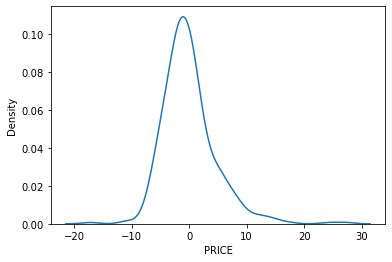

In [41]:
sns.kdeplot(errors)
plt.show()

In [44]:
r2_score(Y_train,train_pred)

0.7508856358979673

In [45]:
test_pred=lm.predict(X_test)
test_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [46]:
test_rmse=np.sqrt(mean_squared_error(Y_test,test_pred))
test_rmse

4.928602182665328

In [47]:
errors1=Y_test-test_pred
errors1.head()

173   -5.396724
274   -3.625565
491   -1.216944
72    -2.231979
452   -2.669880
Name: PRICE, dtype: float64

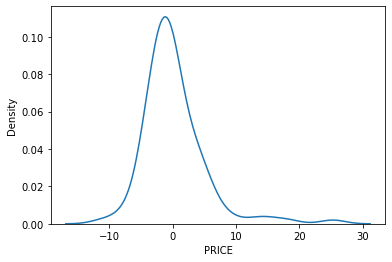

In [48]:
sns.kdeplot(errors1)
plt.show()

In [49]:
r2_score(Y_test,test_pred)

0.6687594935356331

In [50]:
print("Train rmse:",train_rmse)
print("Test rmse:",test_rmse)

Train rmse: 4.6520331848801675
Test rmse: 4.928602182665328


In [54]:
X_train2=sm.add_constant(X_train) #adding constant in the training values to get the beta-0 value.
X_train2.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,1.0,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,1.0,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,1.0,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,1.0,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [55]:
model=sm.OLS(Y_train,X_train2).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          6.21e-109
Time:                        17:54:29   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.000      19.086      41.408
CRIM          -0.1131      0.035     -3.250      0.001      -0.181      -0.045
ZN             0.0301      0.016      1.882      0.061      -0.001       0.062
INDUS          0.0404      0.067      0.599      0.549      -0.092       0.173
CHAS           2.7844      0.956      2.914      0.004       0.905       4.663
NOX          -17.2026      4.236     -4.061      0.000     -25.531      -8.874
RM             4.4388      0.464      9.567      0.000       3.527       5.351
AGE           -0.0063      0.015     -0.432      0.666      -0.035       0.022
DIS           -1.4479      0.226     -6.408      0.000      -1.892      -1.004
RAD            0.2624      0.076      3.454      0.001       0.113       0.412
TAX           -0.0106      0.004     -2.508      0.013      -0.019      -0.002
PTRATIO       -0.9155      0.144     -6.357      0.000      -1.199      -0.632
B              0.0124      0.003      4.166      0.000       0.007       0.018
LSTAT         -0.5086      0.056     -9.133      0.000      -0.618      -0.399
==============================================================================
Omnibus:                      133.052   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.817
Skew:                           1.379   Prob(JB):                    1.24e-126
Kurtosis:                       8.181   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The r2-score is around 75% which means this is not the best model for this dataset. The efficiency can be improved using some other regressor.

So, the prepared model is not very good for predicting housing prices. One can improve the prediction results using many other possible machine learning algorithms and techniques. 

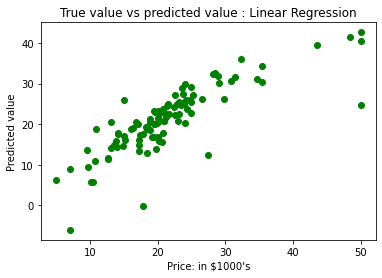

In [37]:
#Plotting Scatter graph to show the prediction
#results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()